# Predicting ELA Proficiency in California Schools



#### Amelia Dahm and Lauren Phipps

## Overview <a id="Overview"></a>

WRITE THIS


[1. Business Problem](#Business-Problem)

[2. Data Understanding](#Data-Understanding)

[3. Data Preparation](#Data-Preparation)

[4. EDA](#EDA)

[5. Modeling](#Modeling)

[6. Evaluation](#Evaluation)

[7. Conclusion](#Conclusion)


***

## Business Problem <a id="Business-Problem"></a>
##### [(back to top)](#Overview)

Students' success during and after their K-12 education is closely tied to their literacy skills. Students who are proficient in ELA are more likely to be successful in graduating and attending a post-secondary institution. As part f an initiative that started in 2015, California's goal is to have 100% of students reaching proficiency in English/Language Arts (ELA) by 2023. As we are reaching the final years of this initiative, it is important to be able to predict which schools are on track to meet this target and determine the factors that are having the highest impact on the students' proficiency. This project aims to determine these factors in order to address the needs that are not being met, with additional funding, intervention programs, or community engagement and support.  Being able to addres this needs will aid in students reaching proficiency and, hopefully, being more successful throughout their life. 

***

## Data Understanding <a id="Data-Understanding"></a>
##### [(back to top)](#Overview)

The data comes from California Department of Education and contains school district information from 2018-2019. It contains 940 rows, each representing a school district in California. The columns represent different characteristics about that district, from student demographic and enrollment information to geographic information. This data will be used to determine which features of a school have an impact on the percentage of students who meet testing standards in ELA. 


In [103]:
#import necessary packages and read in the data
import datacleaning as dc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
df = pd.read_csv('data/California_School_District_Areas_2018-19.csv')

#the column names were changed to make them easier to understand
education = dc.clean(df)

In [104]:
education.head()

,OBJECTID,Year,FedID,CDCode,CDSCode,CountyName,SchoolName,SchoolType,GradeLow,GradeHigh,GradeLowCensus,GradeHighCensus,AssistStatus,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,UpdateNotes,EnrollTotal,EnrollCharter,EnrollNonCharter,AfricanAmerican,AfricanAmericanPct,AmericanIndian,AmericanIndianPct,Asian,AsianPct,Filipino,FilipinoPct,Hispanic,HispanicPct,MultipleRace,MultipleRacePct,PacificIslander,PacificIslanderPct,White,WhitePct,RaceNotReported,RaceNotReportedPct,EnglishLearner,EnglishLearnerPct,Foster,FosterPct,Homeless,HomelessPct,Migrant,MigrantPct,Disability,DisabilityPct,SocioEconDisadvantage,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,ELATested,ELAStdMetPct,MathTested,MathStdMetPct,CCPrepCohortCount,CCPrepPct,AbsentEligCount,AbsentPct,GradCohortCount,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area
0,1,2018-19,601770,161119,1611190000000,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,11260,1877,9383,825,7.3,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,33.500000,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07
1,2,2018-19,601860,161127,1611270000000,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,3682,0,3682,111,3.0,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,30.400000,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06
2,3,2018-19,604740,161143,1611430000000,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",2018-19 District Boundary Adjustment/Correction,10194,383,9811,1440,14.1,16,0.2,731,7.200000,83,0.8,2438,23.900000,1465,14.4,14,0.1,3999,39.200001,8,0.1,953,9.3,23,0.2,265,2.6,0,0.0,1148,11.3,3331,32.700001,3275,33.400002,4614.0,66.699997,4549.0,61.700001,790.0,63.299999,10404.0,9.7,856.0,87.400002,83.300003,10.7,10534.0,1.4,44426.287405,4.376389e+07
3,4,2018-19,607800,161150,1611500000000,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,General Assistance,"13,15","07,09,10","18,20","21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,9269,0,9269,489,5.3,19,0.2,2539,27.400000,420,4.5,2204,23.799999,909,9.8,47,0.5,2480,26.799999,162,1.7,1021,11.0,12,0.1,68,0.7,0,0.0,800,8.6,2284,24.600000,2739,29.600000,4844.0,68.099998,4850.0,63.200001,737.0,57.099998,9433.0,7.4,742.0,92.599998,55.900002,3.0,9532.0,2.2,142338.494091,2.833205e+08
4,5,2018-19,612630,161168,1611680000000,Alameda,Emery Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"21 - Suburban, Large",2018-19 District Boundary Adjustment/Correction,743,0,743,326,30.0,1,0.1,83,11.200000,11,1.5,185,24.900000,62,8.3,8,1.1,67,9.000000,0,0.0,160,21.5,1,0.1,7,0.9,0,0.0,55,7.4,600,80.800003,613,83.099998,376.0,37.099998,377.0,23.299999,40.0,22.500000,760.0,20.5,40.0,100.000000,40.000000,0.0,780.0,3.6,13762.869292,5.368212e+06


In [105]:
education.columns

Index(['OBJECTID', 'Year', 'FedID', 'CDCode', 'CDSCode', 'CountyName',
       'SchoolName', 'SchoolType', 'GradeLow', 'GradeHigh', 'GradeLowCensus',
       'GradeHighCensus', 'AssistStatus', 'CongressUS', 'SenateCA',
       'AssemblyCA', 'LocaleDistrict', 'UpdateNotes', 'EnrollTotal',
       'EnrollCharter', 'EnrollNonCharter', 'AfricanAmerican',
       'AfricanAmericanPct', 'AmericanIndian', 'AmericanIndianPct', 'Asian',
       'AsianPct', 'Filipino', 'FilipinoPct', 'Hispanic', 'HispanicPct',
       'MultipleRace', 'MultipleRacePct', 'PacificIslander',
       'PacificIslanderPct', 'White', 'WhitePct', 'RaceNotReported',
       'RaceNotReportedPct', 'EnglishLearner', 'EnglishLearnerPct', 'Foster',
       'FosterPct', 'Homeless', 'HomelessPct', 'Migrant', 'MigrantPct',
       'Disability', 'DisabilityPct', 'SocioEconDisadvantage',
       'SocioEconDisadvantagePct', 'Unduplicated', 'UnduplicatedPct',
       'ELATested', 'ELAStdMetPct', 'MathTested', 'MathStdMetPct',
       'CCPrepCohortC

***

## Data Preparation <a id="Data-Preparation"></a>
##### [(back to top)](#Overview)

Many steps were taken to prepare the data for EDA and modeling. The full extent of the preparation process can be found in the datacleaning.py file. 

First, the columns that were not relevant to the analysis were dropped (`OBJECTID`, `CDCode`, etc), as well as columns that had a significant number of null values and were characteristics that only pertained to high schools (`GradPct`, `DropOutPct`, etc). We then created dummy variables out of several of the categorical columns: `SchoolType`, `AssistStatus`, `LocaleDistrict`, and `EnrollTotal`. We created a new feature that expressed `EnrollCharter` as a percent of `EnrollTotal`. Additionally, we scaled down any outliers. As a final step, we merged this dataset with an additional dataset containing per pupil funding for each district. 

During this process, we also created the target variable. This was engineered from the `ELAStdPctMet` feature. In order to determine if a school was on target to reach 100% proficiency in ELA, we set the threshold at 61%, which was the value for 75% quantile. If a school is on target, `target` contains a 1, if not, a 0. 

In [106]:
df = dc.dataprep(education)
df.head()

,Year,CountyName,SchoolName,GradeLow,GradeHigh,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,AfricanAmericanPct,AmericanIndianPct,AsianPct,FilipinoPct,HispanicPct,MultipleRacePct,PacificIslanderPct,WhitePct,RaceNotReportedPct,EnglishLearnerPct,FosterPct,HomelessPct,MigrantPct,DisabilityPct,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,ELAStdMetPct,AbsentPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area,smallenrollment,mediumenrollment,largeenrollment,xlenrollment,charterpct,noncharterpct,unified,elem,high,suburban,rural,town,city,Locale,assistance,target
0,2018-19,Alameda,Alameda Unified,KG,12,13,09,18,21,7.3,0.2,25.299999,6.1,17.400000,11.6,0.6,28.799999,2.6,14.2,0.2,0.6,0.0,11.4,31.299999,3144,33.500000,69.400002,9.4,11600.0,2.6,57196.403944,4.733304e+07,0,0,0,1,16.669627,83.330373,1,0,0,1,0,0,0,Suburban,1,1
1,2018-19,Alameda,Albany City Unified,KG,12,13,09,15,21,3.0,0.1,28.900000,1.3,16.100000,13.9,0.2,31.600000,5.1,15.8,0.1,0.3,0.0,8.5,21.100000,1118,30.400000,79.199997,6.4,3830.0,1.9,12870.772156,7.161276e+06,0,0,1,0,0.000000,100.000000,1,0,0,1,0,0,0,Suburban,0,1
2,2018-19,Alameda,Berkeley Unified,KG,12,13,09,15,12,14.1,0.2,7.200000,0.8,23.900000,14.4,0.1,39.200001,0.1,9.3,0.2,2.6,0.0,11.3,32.700001,3275,33.400002,66.699997,9.7,10534.0,1.4,44426.287405,4.376389e+07,0,0,0,1,3.757112,96.242888,1,0,0,0,0,0,1,City,1,1
3,2018-19,Alameda,Castro Valley Unified,KG,12,"13,15","07,09,10","18,20",21,5.3,0.2,27.400000,4.5,23.799999,9.8,0.5,26.799999,1.7,11.0,0.1,0.7,0.0,8.6,24.600000,2739,29.600000,68.099998,7.4,9532.0,2.2,142338.494091,2.833205e+08,0,0,0,1,0.000000,100.000000,1,0,0,1,0,0,0,Suburban,0,1
4,2018-19,Alameda,Emery Unified,KG,12,13,09,15,21,30.0,0.1,11.200000,1.5,24.900000,8.3,1.1,9.000000,0.0,21.5,0.1,0.9,0.0,7.4,80.800003,613,83.099998,37.099998,20.5,780.0,3.6,13762.869292,5.368212e+06,0,1,0,0,0.000000,100.000000,1,0,0,1,0,0,0,Suburban,1,0


In [107]:
df.LocaleDistrict.value_counts()

21    235
41    142
42    125
32     68
43     63
31     56
12     53
11     51
13     45
22     42
33     33
23     31
Name: LocaleDistrict, dtype: int64

In [108]:
df.describe()

,GradeHigh,AfricanAmericanPct,AmericanIndianPct,AsianPct,FilipinoPct,HispanicPct,MultipleRacePct,PacificIslanderPct,WhitePct,RaceNotReportedPct,EnglishLearnerPct,FosterPct,HomelessPct,MigrantPct,DisabilityPct,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,ELAStdMetPct,AbsentPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area,smallenrollment,mediumenrollment,largeenrollment,xlenrollment,charterpct,noncharterpct,unified,elem,high,suburban,rural,town,city,assistance,target
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,920.000000,944.000000,944.000000,944.000000,944.000000,9.440000e+02,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,9.958686,2.540466,1.707415,5.368856,1.353284,45.025636,4.500636,0.349894,37.744809,1.080720,17.504025,0.519703,3.121081,1.473517,10.698411,57.559110,3292.684322,60.406991,50.148478,11.582521,6232.625000,3.383792,137478.658644,8.992017e+08,0.250000,0.250000,0.250000,0.250000,9.354164,90.645836,0.364407,0.555085,0.080508,0.281780,0.349576,0.106992,0.157839,0.320975,0.243644
std,2.135244,4.113993,4.834101,9.993284,2.592887,28.123249,4.216689,0.692774,25.597142,2.817625,16.198711,0.778866,5.269932,3.398658,3.865557,25.054015,6288.946428,24.968052,16.252210,8.017214,10870.965762,3.093163,120833.689911,1.835299e+09,0.433242,0.433242,0.433242,0.433242,22.751562,22.751562,0.481519,0.497220,0.272223,0.450105,0.477089,0.309266,0.364783,0.467099,0.429508
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.700000,0.000000,0.000000,0.000000,2134.672224,2.821288e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.400000,0.100000,0.500000,0.000000,19.450000,1.200000,0.000000,13.175000,0.000000,4.900000,0.100000,0.200000,0.000000,8.600000,38.975001,157.000000,42.249999,38.000000,6.600000,419.500000,1.300000,54183.396949,8.853034e+07,0.000000,0.000000,0.000000,0.000000,0.000000,95.074166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,1.100000,0.400000,1.600000,0.500000,40.799999,3.550000,0.200000,36.850001,0.300000,13.050000,0.300000,1.000000,0.000000,10.800000,59.500000,784.500000,62.850001,48.599998,10.100000,2162.500000,2.700000,101249.413155,2.769788e+08,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.000000,2.700000,1.100000,5.100000,1.400000,67.549999,6.600000,0.400000,60.124999,1.100000,24.925000,0.700000,3.725000,1.100000,12.500000,77.925002,3189.250000,81.124998,61.225001,14.400000,6976.250000,4.800000,180708.436455,8.492910e+08,0.250000,0.250000,0.250000,0.250000,4.925834,100.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,12.000000,30.000000,40.000000,73.099998,30.200001,100.000000,30.000000,10.000000,100.000000,46.000000,78.599998,8.300000,40.000000,22.000000,35.700001,100.000000,50000.000000,100.000000,91.599998,65.400002,100000.000000,25.900000,913155.411235,2.111754e+10,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***

## EDA <a id="EDA"></a>
##### [(back to top)](#Overview)

The first step was to look at the distribution of Percent of Students Meeting the ELA Standard to create a target variable. This was done in the boxplot below. 

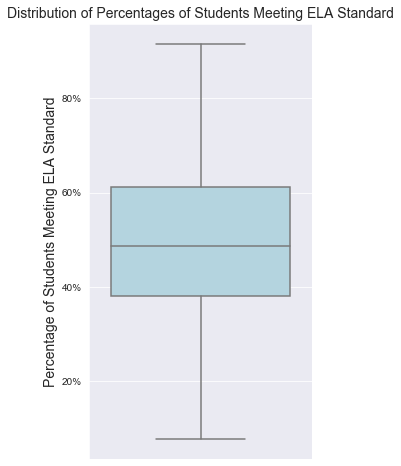

In [109]:
fig, ax = plt.subplots(figsize = (4, 8))
ax = sns.boxplot(y = df.ELAStdMetPct, color = 'lightblue')
ax.set_title("Distribution of Percentages of Students Meeting ELA Standard", fontsize = 14)
ax.set_ylabel('Percentage of Students Meeting ELA Standard', fontsize= 14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In order to determine which districts were "on track" to reaching 100% students meeting the standards, we set the threshold to be 61.5%, which is where the 75% quartile fell, according to the boxplot below. 


The next step in EDA was to look at the relationship between the percentage of students who met the ELA testing standard and several continuous variables. This was done using several scatter plots.

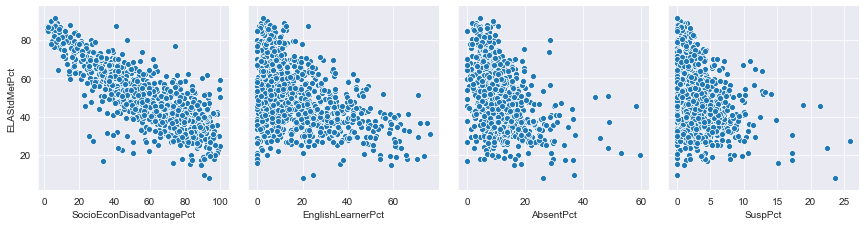

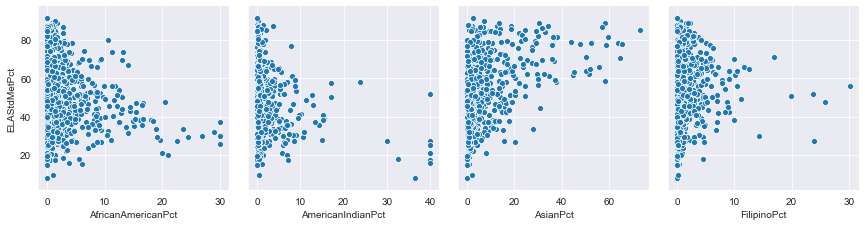

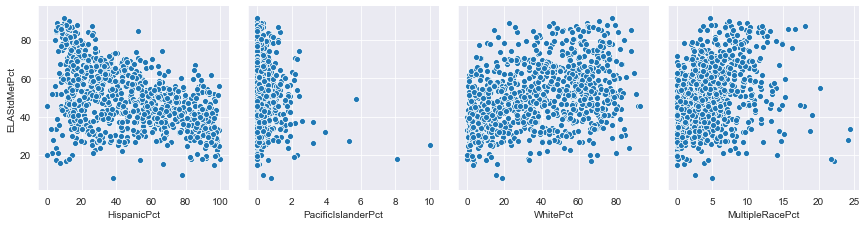

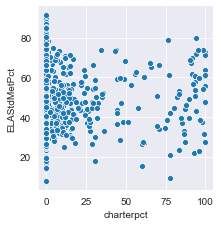

In [110]:
features = ['SocioEconDisadvantagePct', 'EnglishLearnerPct', 'AbsentPct', 'SuspPct', 'AfricanAmericanPct', 'AmericanIndianPct', 'AsianPct', 'FilipinoPct', 'HispanicPct', 'PacificIslanderPct', 'WhitePct', 'MultipleRacePct', 'charterpct']
n=4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['ELAStdMetPct'],x_vars=i, kind="scatter", height=3)

These plots show that several variables appear to have a negative relationship with the percentage of students meeting ELA standards, specifically `SocioEconDisadvantagePct`, `AbsentPct`, `EnglishLearnerPct`, and `SusPct`. The racial demographics did not seem to have a strong relationship with the ELA standards, with the exception of `HispanicPct`, which is highly correlated (0.78) with `EnglishLearnerPct`, and `AsianPct`, which is slightly positively correlated. These charts lined up with the feature importance derived from our final model. 


Because `AbsentPct` (which is the percentage of students who are chronically absent, meaning they were absent more than 10 days in a school year) and `SocioEconDisadvantagePct` where strongly linked with the percentage of students meeting ELA Standards, we pulled them out to see the interaction of the variables below. 

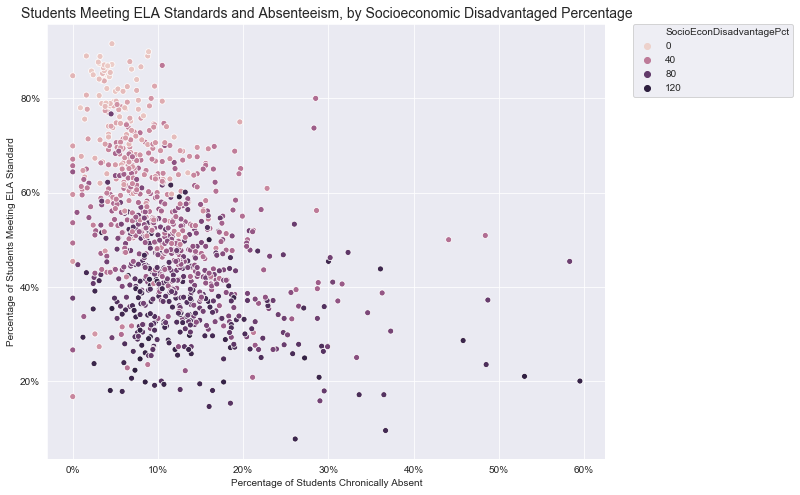

In [111]:
x = df.AbsentPct
y = df.ELAStdMetPct
hue=df.SocioEconDisadvantagePct

fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.scatterplot(x,y, hue=hue);
ax.set_title('Students Meeting ELA Standards and Absenteeism, by Socioeconomic Disadvantaged Percentage',fontsize=14);
ax.set_xlabel('Percentage of Students Chronically Absent', fontsize=10);
ax.set_ylabel('Percentage of Students Meeting ELA Standard', fontsize=10);
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

The chart above shows that districts that had low rates of absenteeism also had a lower percentage of students who are socioeconomically disadvantaged. These both correlated with a higher percentage of students meeting ELA standards. Districts that had less than 50% of students meeting ELA standards tended to have higher rates of absenteeism and more students who were socioeconomically disadvantaged. 



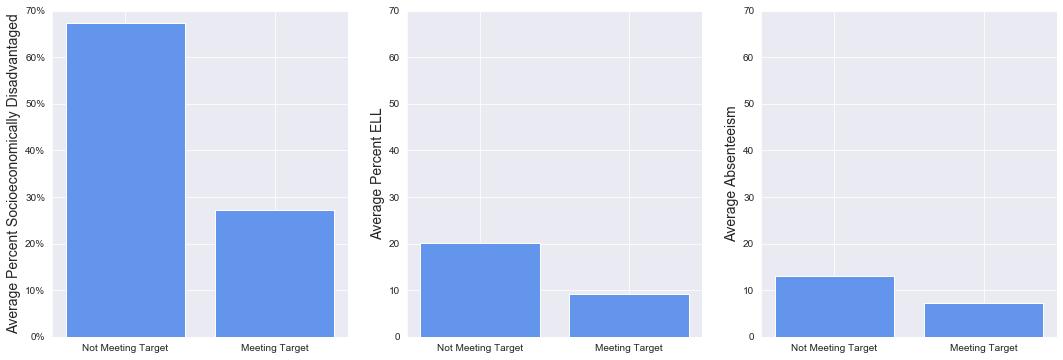

In [112]:
x = ['Not Meeting Target', 'Meeting Target']
y = df.groupby('target')['EnglishLearnerPct'].mean()
z = df.groupby('target')['AbsentPct'].mean()
w = df.groupby('target')['SocioEconDisadvantagePct'].mean()

#Create figure and subplots
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

#Create barcharts
ax.bar(x, w, color='cornflowerblue')
ax2.bar(x, y, color = 'cornflowerblue')
ax3.bar(x, z, color= 'cornflowerblue')

#Format axes
ax.set_ylim(0, 70)
ax2.set_ylim(0, 70)
ax3.set_ylim(0, 70)
ax.set_ylabel('Average Percent Socioeconomically Disadvantaged', fontsize = 14)
ax2.set_ylabel('Average Percent ELL', fontsize = 14)
ax3.set_ylabel('Average Absenteeism', fontsize = 14)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [113]:
# importing fips codes to produce county visualizations

fips_df = pd.read_csv('EDA/hello_fips.csv', header=None)
fips_df['CountyName'] = fips_df[1]  
fips_df['code'] = fips_df[2].astype(object)
fips_df.drop(columns=[0, 2, 1], axis=1, inplace=True)
fips_df.drop(0, axis=0, inplace=True)

for item in fips_df.code:
    item_new = str(item)
    item_new = item_new[4:]
    fips_df['code'] = fips_df['code'].replace(item, item_new)

df_viz = df.merge(fips_df, on='CountyName', how='left')
counties = list(df.CountyName.unique())

eng = []
absent = []
enroll = []
englearner = []
ssuburban = []
srural = []
stown = []
scity = []
socioecon = []
for item in counties:
    c_df = df_viz[df_viz['CountyName'] == item]
    eng.append(c_df.ELAStdMetPct.mean())
    englearner.append(c_df.EnglishLearnerPct.mean())
    enroll.append('1')
    absent.append(c_df.AbsentPct.mean())
    ssuburban.append(c_df.suburban.sum())
    srural.append(c_df.rural.sum())
    stown.append(c_df.town.sum())
    scity.append(c_df.city.sum())
    socioecon.append(c_df.SocioEconDisadvantagePct.mean())


county_dict = [{'CountyName':counties,'Score':eng,'Absent':absent,'Enroll':enroll,'EngLearner':englearner,'Suburban':ssuburban,'Rural':srural,'Town':stown,'City':scity, 'SocioEconDis':socioecon} for counties,eng,absent,enroll,englearner,ssuburban,srural,stown,scity,socioecon in zip(counties,eng,absent,enroll,englearner, ssuburban,srural,stown,scity,socioecon)]
countydf = pd.DataFrame.from_dict(county_dict)
countydf = countydf.merge(fips_df, on='CountyName', how='left')
countydf['Score'] = countydf['Score'].round().astype('int64')

In [114]:
import plotly
import plotly.figure_factory as ff
from plotly.offline import *
from colour import Color

counties = countydf['code'].tolist()
score = countydf['SocioEconDis'].tolist()

heatmap_color = ['black','black','black',
    'deepskyblue', # 20-30
    'lightskyblue', # 30-40
    'aliceblue', # 40-50
    'white', # 50-60
    'mistyrose', # 60-70
    'tomato', # 70-80
    'orangered'] # 80+ 

endpts = list(range(0,90,10))

fig = ff.create_choropleth(
      fips = counties, values = score, colorscale = heatmap_color,
      show_state_data = True, scope = ['CA'],
      binning_endpoints=endpts,
      county_outline={'color': 'rgb(15,15,55)', 'width': 1},
      state_outline={'color': 'rgb(15,15,55)', 'width': 1},
      legend_title='Socioeconimic Disadvataged Student', title='Socioeconimic Disadvataged Student Rate by County')

iplot(fig)

In [115]:
counties = countydf['code'].tolist()
score = countydf['Score'].tolist()

heatmap_color = ['springgreen','turquoise','paleturquoise','lightskyblue', 
    'orangered', # 30-40
    'mistyrose', # 40-50
    'white', # 50-60
    'lightskyblue', # 60-70
    'darkviolet']

endpts = list(range(0,80,10))

fig = ff.create_choropleth(
      fips = counties, values = score, colorscale = heatmap_color,
      show_state_data = True, scope = ['CA'],
      binning_endpoints=endpts,
      county_outline={'color': 'rgb(15,15,55)', 'width': 1},
      state_outline={'color': 'rgb(15,15,55)', 'width': 1},
      legend_title='English Passing Rate', title='Average English Passing Rate by County')

iplot(fig)

***

## Modeling <a id="Modeling"></a>
##### [(back to top)](#Overview)

The goal of this project was to be able to target schools who are not on track to meeting ELA standards and create actionable interventions to help support these schools. Because of this, it is important to have a highly interpretable model. We need to be able to see the relative importance of certain factors in order to know which will create the greatest impact on the outcome. 

We are using precision as our evaluation metric for these models in order to reduce the number of false positives. In this scenario, it is worse to have a district labeled as being on target when it is not because then it will miss out on additional support. 

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [118]:
df.isnull().sum()

Year                          0
CountyName                    0
SchoolName                    0
GradeLow                      0
GradeHigh                     0
CongressUS                    0
SenateCA                      0
AssemblyCA                    0
LocaleDistrict                0
AfricanAmericanPct            0
AmericanIndianPct             0
AsianPct                      0
FilipinoPct                   0
HispanicPct                   0
MultipleRacePct               0
PacificIslanderPct            0
WhitePct                      0
RaceNotReportedPct            0
EnglishLearnerPct             0
FosterPct                     0
HomelessPct                   0
MigrantPct                    0
DisabilityPct                 0
SocioEconDisadvantagePct      0
Unduplicated                  0
UnduplicatedPct               0
ELAStdMetPct                 24
AbsentPct                     0
EnrollCumulative              0
SuspPct                       0
SHAPE_Length                  0
SHAPE_Ar

In [119]:
# 
df[df['Locale'].isna() == False]

,Year,CountyName,SchoolName,GradeLow,GradeHigh,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,AfricanAmericanPct,AmericanIndianPct,AsianPct,FilipinoPct,HispanicPct,MultipleRacePct,PacificIslanderPct,WhitePct,RaceNotReportedPct,EnglishLearnerPct,FosterPct,HomelessPct,MigrantPct,DisabilityPct,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,ELAStdMetPct,AbsentPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area,smallenrollment,mediumenrollment,largeenrollment,xlenrollment,charterpct,noncharterpct,unified,elem,high,suburban,rural,town,city,Locale,assistance,target
0,2018-19,Alameda,Alameda Unified,KG,12,13,09,18,21,7.3,0.2,25.299999,6.1,17.400000,11.6,0.6,28.799999,2.6,14.200000,0.2,0.6,0.0,11.4,31.299999,3144,33.500000,69.400002,9.4,11600.0,2.6,57196.403944,4.733304e+07,0,0,0,1,16.669627,83.330373,1,0,0,1,0,0,0,Suburban,1,1
1,2018-19,Alameda,Albany City Unified,KG,12,13,09,15,21,3.0,0.1,28.900000,1.3,16.100000,13.9,0.2,31.600000,5.1,15.800000,0.1,0.3,0.0,8.5,21.100000,1118,30.400000,79.199997,6.4,3830.0,1.9,12870.772156,7.161276e+06,0,0,1,0,0.000000,100.000000,1,0,0,1,0,0,0,Suburban,0,1
2,2018-19,Alameda,Berkeley Unified,KG,12,13,09,15,12,14.1,0.2,7.200000,0.8,23.900000,14.4,0.1,39.200001,0.1,9.300000,0.2,2.6,0.0,11.3,32.700001,3275,33.400002,66.699997,9.7,10534.0,1.4,44426.287405,4.376389e+07,0,0,0,1,3.757112,96.242888,1,0,0,0,0,0,1,City,1,1
3,2018-19,Alameda,Castro Valley Unified,KG,12,"13,15","07,09,10","18,20",21,5.3,0.2,27.400000,4.5,23.799999,9.8,0.5,26.799999,1.7,11.000000,0.1,0.7,0.0,8.6,24.600000,2739,29.600000,68.099998,7.4,9532.0,2.2,142338.494091,2.833205e+08,0,0,0,1,0.000000,100.000000,1,0,0,1,0,0,0,Suburban,0,1
4,2018-19,Alameda,Emery Unified,KG,12,13,09,15,21,30.0,0.1,11.200000,1.5,24.900000,8.3,1.1,9.000000,0.0,21.500000,0.1,0.9,0.0,7.4,80.800003,613,83.099998,37.099998,20.5,780.0,3.6,13762.869292,5.368212e+06,0,1,0,0,0.000000,100.000000,1,0,0,1,0,0,0,Suburban,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,2018-19,Yolo,Esparto Unified,KG,12,03,03,04,32,1.7,1.0,0.900000,0.5,77.000000,1.7,0.0,17.200001,0.0,27.799999,0.5,13.1,9.2,11.7,83.199997,783,83.199997,31.900000,13.8,1042.0,5.2,226125.983751,1.551963e+09,0,1,0,0,0.000000,100.000000,1,0,0,0,0,1,0,Town,0,0
936,2018-19,Yolo,Washington Unified,KG,12,"03,06","03,06","04,07",21,4.7,0.6,13.400000,2.1,43.599998,4.3,1.2,28.700001,1.3,18.200001,0.9,3.4,0.0,9.2,66.500000,5296,69.199997,45.400002,12.1,8811.0,3.8,52184.901193,1.216133e+08,0,0,0,1,7.978851,92.021149,1,0,0,1,0,0,0,Suburban,1,0
939,2018-19,Yuba,Camptonville Elementary,KG,12,03,04,03,22,1.2,1.7,0.400000,0.2,17.500000,10.6,0.6,66.500000,1.2,1.500000,0.6,0.2,0.0,14.8,54.700001,39,81.199997,68.800003,5.4,552.0,1.4,79862.488656,2.462935e+08,0,1,0,0,90.020790,9.979210,0,1,0,0,0,0,0,Suburban,1,1
940,2018-19,Yuba,Marysville Joint Unified,KG,12,"01,03",04,"01,03",22,3.5,2.4,8.800000,0.5,43.299999,3.8,0.4,36.500000,0.9,21.900000,0.9,1.6,0.6,11.3,79.400002,7811,81.599998,36.900002,10.6,10830.0,6.1,349629.046956,2.028548e+09,0,0,0,1,5.712597,94.287403,1,0,0,0,0,0,0,Suburban,1,0


In [120]:

#################### add to data clean ###############################
# df['AbsentPct'] = df['AbsentPct'].replace(np.NaN, 0)
# df['EnrollCumulative'] = df['EnrollCumulative'].replace(np.NaN, 0) 
# df['SuspPct'] = df['SuspPct'].replace(np.NaN, 0) 
df['Locale'] = df['Locale'].replace(np.NaN, 0) 


In [121]:
df.drop(columns = ['UnduplicatedPct', 'Unduplicated'], inplace = True)
######################################################################

In [122]:
df2 = df.select_dtypes(exclude=['object'])

# features
X = df2.drop('target', axis = 1) 
# target variable
y = df2['target']

df_features = df.drop('target', axis = 1)

In [123]:
# test-train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=20)

In [124]:
df.ELAStdMetPct.dropna(inplace=True)

#### Logistic Regression

In [125]:
features = ['AfricanAmericanPct', 'AmericanIndianPct', 'AsianPct', 'AbsentPct', 'HispanicPct', 'WhitePct', 'EnglishLearnerPct', 'SocioEconDisadvantagePct', 'smallenrollment', 'mediumenrollment', 'largeenrollment', 'xlenrollment', 'charterpct', 'suburban', 'rural', 'town', 'city', 'assistance']
scaler = StandardScaler()  
scaler.fit(X_train[features])
X_train_scaled = scaler.transform(X_train[features])  
X_test_scaled = scaler.transform(X_test[features])

In [126]:
lr_initial = LogisticRegression(C = 1, random_state = 20, class_weight = 'balanced')
lr_initial.fit(X_train_scaled, y_train)

lr_pred_train = lr_initial.predict(X_train_scaled)
lr_initial_pred = lr_initial.predict(X_test_scaled)

In [127]:
coef = dict(zip(list(features), list(lr_initial.coef_[0])))
sorted_dict1 = sorted(coef.items(), key=lambda kv: kv[1])
sorted_dict1.reverse()
sorted_dict1

[('AsianPct', 1.0136819430608146),
 ('HispanicPct', 0.6517031676685562),
 ('WhitePct', 0.1339141075479095),
 ('smallenrollment', 0.08444051587393595),
 ('charterpct', 0.061275631910763455),
 ('town', 0.0580482020546393),
 ('largeenrollment', 0.006502906410729535),
 ('xlenrollment', 0.002109545291991872),
 ('AbsentPct', -0.026671376331056564),
 ('mediumenrollment', -0.09207326061088003),
 ('AfricanAmericanPct', -0.18568051016890647),
 ('city', -0.2565567629708255),
 ('suburban', -0.2794787083729857),
 ('assistance', -0.3778638633247046),
 ('rural', -0.43840899791537624),
 ('EnglishLearnerPct', -0.4535632179266099),
 ('AmericanIndianPct', -0.7319527147884695),
 ('SocioEconDisadvantagePct', -2.649678738487126)]

In [128]:
THRESHOLD = .8
y_pred_lr_initial_test = np.where(lr_initial.predict_proba(X_test_scaled)[:,1] > THRESHOLD, 1, 0)
y_pred_lr_initial_train = np.where(lr_initial.predict_proba(X_train_scaled)[:,1] > THRESHOLD, 1, 0)

In [129]:
metric_dict = {}
metric_dict['LogisticRegression'] = {'train_accuracy': metrics.accuracy_score(y_train, lr_pred_train),
                                      'test_accuracy': metrics.accuracy_score(y_test, lr_initial_pred),
                                      'train_precision':metrics.precision_score(y_train, lr_pred_train),
                                      'test_precision':metrics.precision_score(y_test, lr_initial_pred),
                                      'train_recall':metrics.recall_score(y_train, lr_pred_train),
                                      'test_recall':metrics.recall_score(y_test, lr_initial_pred),
                                      'train_f1':metrics.f1_score(y_train, lr_pred_train),
                                      'test_f1':metrics.f1_score(y_test, lr_initial_pred)}

In [130]:
metric_dict['LogisticRegressionThreshold'] = {'train_accuracy': metrics.accuracy_score(y_train, y_pred_lr_initial_train),
                                              'test_accuracy': metrics.accuracy_score(y_test, y_pred_lr_initial_test),
                                              'train_precision':metrics.precision_score(y_train, y_pred_lr_initial_train),
                                              'test_precision':metrics.precision_score(y_test, y_pred_lr_initial_test),
                                              'train_recall':metrics.recall_score(y_train, y_pred_lr_initial_train),
                                              'test_recall':metrics.recall_score(y_test, y_pred_lr_initial_test),
                                              'train_f1':metrics.f1_score(y_train, y_pred_lr_initial_train),
                                              'test_f1':metrics.f1_score(y_test, y_pred_lr_initial_test)}

#### Decision Tree

In [131]:
decision_tree = DecisionTreeClassifier(random_state=1)

In [132]:
param_dict={'max_depth': range(1,10),
            'criterion': ['gini', 'entropy'],
            'splitter': ['random', 'best'],
            'max_features': ['auto', 'sqrt', 'log2']}

In [133]:
grid_tree=GridSearchCV(decision_tree, 
                       param_dict, 
                       cv=10, 
                       scoring='f1', 
                       verbose=1, 
                       n_jobs=-1)

In [136]:
# grid_tree.fit(X_train,y_train)

In [101]:
# y_pred_dtc_test = grid_tree.best_estimator_.predict(X_test)
# y_pred_dtc_train = grid_tree.best_estimator_.predict(X_train)

In [102]:
# metric_dict['DecisionTree'] = {'train_accuracy': metrics.accuracy_score(y_train, y_pred_dtc_train),
#                                   'test_accuracy': metrics.accuracy_score(y_test, y_pred_dtc_test),
#                                   'train_precision':metrics.precision_score(y_train, y_pred_dtc_train),
#                                   'test_precision':metrics.precision_score(y_test, y_pred_dtc_test),
#                                   'train_recall':metrics.recall_score(y_train, y_pred_dtc_train),
#                                   'test_recall':metrics.recall_score(y_test, y_pred_dtc_test),
#                                   'train_f1':metrics.f1_score(y_train, y_pred_dtc_train),
#                                   'test_f1':metrics.f1_score(y_test, y_pred_dtc_test)}

***

## Evaluation <a id="Evaluation"></a>
##### [(back to top)](#Overview)

In [95]:
# metrics from each model
pd.DataFrame.from_dict(metric_dict, orient='index')

,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
LogisticRegression,0.880795,0.878307,0.692308,0.745455,0.900000,0.82,0.782609,0.780952
LogisticRegressionThreshold,0.908609,0.878307,0.867550,0.935484,0.727778,0.58,0.791541,0.716049


***

## Conclusion <a id="Conclusion"></a>
##### [(back to top)](#Overview)